In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('zomato.csv')
df1=df.copy()
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
for i in df.columns:
    print(i ,':', df[i].nunique())

url : 51717
address : 11495
name : 8792
online_order : 2
book_table : 2
rate : 64
votes : 2328
phone : 14926
location : 93
rest_type : 93
dish_liked : 5271
cuisines : 2723
approx_cost(for two people) : 70
reviews_list : 22513
menu_item : 9098
listed_in(type) : 7
listed_in(city) : 30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


<AxesSubplot:>

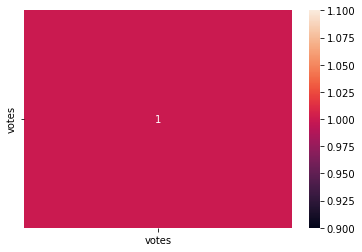

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
(df.isnull().sum()/len(df))*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# AS WE CAN SEE BELOW ALL OF THESE COLUMNS ARE OBJECT TYPES & AS THE ELEMENTS ARE MULTI-CHRACTERISED ALSO CHARACTER DRIVEN. 

In [8]:
df[['url','address',"phone",'reviews_list']].dtypes

url             object
address         object
phone           object
reviews_list    object
dtype: object

In [9]:
df[['url','address',"phone",'reviews_list']].nunique()

url             51717
address         11495
phone           14926
reviews_list    22513
dtype: int64

# EXAMPLES OF THE TYPE OF ELEMENTS IN THESE COLUMNS ARE GIVEN BELOW 

In [10]:
df['url'][1]

'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'

In [11]:
df['address'][1]

'2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore'

In [12]:
df['phone'][1]

'080 41714161'

In [13]:
df['reviews_list'][1]

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

# SINCE NONE OF THEM CAN BE A CONTRIBUTING FACTOR  TO THE FINAL MODEL BUILDING BECAUSE OF THE NATURE OF THESE FEATURES AND THE ELEMENTS IN THEM THESE COLUMNS ARE GOING TO BE ELIMINATED.

In [14]:
df.drop(['url', 'address',"phone",'reviews_list'],axis=1,inplace=True)

# CHANGING ELEMENTS & COLUMN TYPES

In [15]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
df['rate']=df['rate'].str.replace('/5','')

In [17]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
df['rate']=df['rate'].replace('-',np.nan).replace('NEW',np.nan)

In [19]:
df['rate']=df['rate'].astype('float64')

In [20]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [21]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')

In [22]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [23]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('float64')

# OUTLIER TREATMENT : OUTLIER TREATMENT HAS BEEN DONE FOR THIS PARTICULAR DATASET BUT OUTLIER TREATMENT COMPLETELY DEPENDS ON THE NATURE OF THE DATASET .

In [24]:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)
IQR = Q3 - Q1
LL= Q1 - 1.5*IQR
UL= Q3 + 1.5*IQR

In [25]:
df_new = df[(df['rate'] < LL) | (df['rate'] > UL)]
df_new

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
1532,Mast Kalandar,No,No,2.4,183,Bannerghatta Road,Delivery,"Lassi, Raita, Chole, Dal Makhani, Gulab Jamun,...",North Indian,450.0,[],Delivery,Bannerghatta Road
1570,Tandoor Hut,No,No,2.2,90,Bannerghatta Road,Casual Dining,"Noodles, Tandoori Chicken","North Indian, Chinese",750.0,[],Delivery,Bannerghatta Road
1573,Zaika Take Away,No,No,2.4,96,Bannerghatta Road,Casual Dining,"Butter Naan, Kadhai Mushroom","North Indian, Chinese, Thai",500.0,[],Delivery,Bannerghatta Road
1637,Ammi's Biryani,No,No,2.4,392,Bannerghatta Road,NaN,"Chicken Biryani, Hyderabadi Biryani, Rolls, Mu...","Biryani, North Indian",500.0,[],Delivery,Bannerghatta Road
1647,Vasudev Adiga's,No,No,2.3,291,Bannerghatta Road,Casual Dining,"Coffee, Masala Dosa, Curd Rice, Idli Vada","South Indian, North Indian, Chinese, Street Fo...",250.0,[],Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49415,Mast Kalandar,No,No,2.1,338,Bellandur,Casual Dining,"Khichda, Gaon Ki Thali, Buttermilk, Dal Makhan...",North Indian,450.0,[],Delivery,Sarjapur Road
49750,Madurai Idly Shop,No,No,2.1,193,Sarjapur Road,Quick Bites,"Idli, Vada, Pongal, Filter Coffee, Mini Idlis,...",South Indian,200.0,[],Dine-out,Sarjapur Road
49919,Bhagini,No,No,2.3,132,Bellandur,Casual Dining,"Masala Peanuts, Chicken Biryani, Roti","Andhra, South Indian, Chinese, North Indian",800.0,[],Dine-out,Sarjapur Road
49964,Mast Kalandar,No,No,2.1,338,Bellandur,Casual Dining,"Khichda, Gaon Ki Thali, Buttermilk, Dal Makhan...",North Indian,450.0,[],Dine-out,Sarjapur Road


In [26]:
df=df.drop(df_new.index)

In [27]:
df=df.set_index(np.arange(0,len(df)))

# NULL VALUE TREATMENT

In [28]:
100*(df.isnull().sum()/len(df))

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.507083
votes                           0.000000
location                        0.040753
rest_type                       0.432758
dish_liked                     54.453716
cuisines                        0.087328
approx_cost(for two people)     0.671454
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

# SINCE 'dish_liked' COLUMN HAS 54% OF NULL VALUES THIS COLUMN IS ELIMINATED

In [29]:
df=df.drop('dish_liked',axis=1)

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt

# NULL IMPUTATION OF NUMERICAL VARIABLES

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness : 2.6 ,Since the skewness is beyond the range of -0.5 and +0.5 median is imputed.


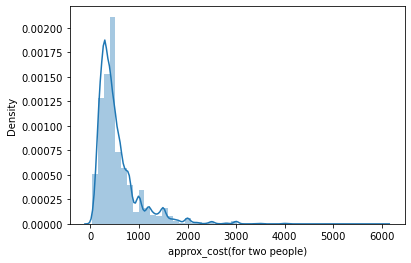

In [31]:
sns.distplot(df['approx_cost(for two people)'])
print('skewness :',round(df['approx_cost(for two people)'].skew(),1),',Since the skewness is beyond the range of -0.5 and +0.5 median is imputed.')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skewness : -0.2 ,Since the skewness is between the range of -0.5 and +0.5 mean is imputed.


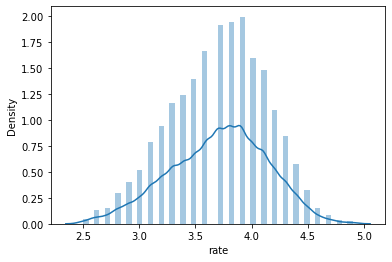

In [32]:
sns.distplot(df['rate'])
print('skewness :',round(df['rate'].skew(),1),',Since the skewness is between the range of -0.5 and +0.5 mean is imputed.')

In [33]:
round(df['approx_cost(for two people)'].median())

400

In [34]:
round(df['rate'].mean(),1)

3.7

In [35]:
df['rate']=df['rate'].fillna(round(df['rate'].mean(),1))

In [36]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())

# NULL IMPUTATION OF CATEGORICAL VARIABLES

In [38]:
df['location']=df['location'].fillna(df['location'].mode()[0])

In [39]:
df['rest_type']=df['rest_type'].fillna(df['rest_type'].mode()[0])

In [40]:
df['cuisines']=df['cuisines'].fillna(df['cuisines'].mode()[0])

In [41]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# ENCODING CATEGORICAL VARIABLES & SCALING NUMERICAL VARIABLES EXCEPT THE TARGET COLUMN

# ONE MAJOR PROBLEM WITH LABEL ENCODING IS THAT THE ALGORITHM MISINTERPRETS THE NUMERIC VALUES TO HAVE A HIERARCHY BUT SINCE THE CATEGORICAL VALUES HAVE MULTIPLE ELEMENTS IN THEM LABEL ENCODING HAS BEEN USED  .

In [43]:
df_cat=df.select_dtypes('object')

In [44]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [45]:
le=LabelEncoder()

In [46]:
df_le=df_cat.apply(le.fit_transform)

In [48]:
df_num=df.select_dtypes(['int64','float64']).drop('rate',axis=1)

In [49]:
ss=StandardScaler()

In [50]:
df_num_ss=pd.DataFrame(ss.fit_transform(df_num),columns=df_num.columns)

In [51]:
df_preprocessed=pd.concat([df_le,df_num_ss,df['rate']],axis=1)

In [52]:
df_preprocessed

,name,online_order,book_table,location,rest_type,cuisines,menu_item,listed_in(type),listed_in(city),votes,approx_cost(for two people),rate
0,3685,1,1,1,27,2156,9071,0,1,0.609827,0.561804,4.1
1,7011,1,0,1,27,951,9071,0,1,0.624729,0.561804,4.1
2,6488,1,0,1,22,766,9071,0,1,0.787414,0.561804,3.8
3,199,0,0,1,78,2552,9071,0,1,-0.243334,-0.579885,3.7
4,2935,0,0,4,27,2185,9071,0,1,-0.146468,0.105128,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...
51525,899,0,0,89,8,1008,9071,6,29,-0.319087,2.160169,3.6
51526,8489,0,0,89,8,1389,9071,6,29,-0.352618,0.105128,3.7
51527,5824,0,0,89,8,1389,9071,6,29,-0.352618,3.301858,3.7
51528,1727,0,1,26,8,1389,9071,6,29,-0.059538,4.443547,4.3


# DELETING DUPLICATED ROWS

In [53]:
df_preprocessed.duplicated().sum()

87

In [54]:
df_preprocessed.drop_duplicates(keep='first',inplace=True)

# THE BELOW DATAFRAME IS THE PREPROCESSED ONE WHERE ALL THE CLEANING IS DONE AND IS READY TO BE FIT IN A MODEL.THE CATEGORICAL VARIABLES HAVE BEEN APLLIED LABEL ENCODING AND THE NUMERICAL VARIABLES EXCEPT RATE HAVE BEEN APPLIED STANDARDSCALER (EXCLUDING REDUDANT COLUMNS)

In [55]:
df_preprocessed.describe()

,name,online_order,book_table,location,rest_type,cuisines,menu_item,listed_in(type),listed_in(city),votes,approx_cost(for two people),rate
count,51443.000000,51443.000000,51443.000000,51443.000000,51443.000000,51443.000000,51443.000000,51443.000000,51443.000000,51443.000000,51443.000000,51443.000000
mean,4323.384853,0.588904,0.124584,36.067823,51.397683,1400.683106,8005.604494,2.806757,14.207045,-0.000474,-0.000460,3.705398
std,2550.701400,0.492037,0.330250,27.193911,27.590456,771.534260,2304.340598,1.140306,8.284279,0.999251,0.999521,0.386433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.352618,-1.173564,2.500000
25%,2052.000000,0.000000,0.000000,12.000000,27.000000,695.000000,9071.000000,2.000000,7.000000,-0.343925,-0.579885,3.500000
50%,4284.000000,1.000000,0.000000,32.000000,46.000000,1469.000000,9071.000000,2.000000,15.000000,-0.301701,-0.351547,3.700000
75%,6547.000000,1.000000,0.000000,55.000000,78.000000,1976.000000,9071.000000,4.000000,20.000000,-0.107970,0.219297,3.900000
max,8776.000000,1.000000,1.000000,92.000000,92.000000,2719.000000,9071.000000,6.000000,29.000000,20.550437,12.435372,4.900000


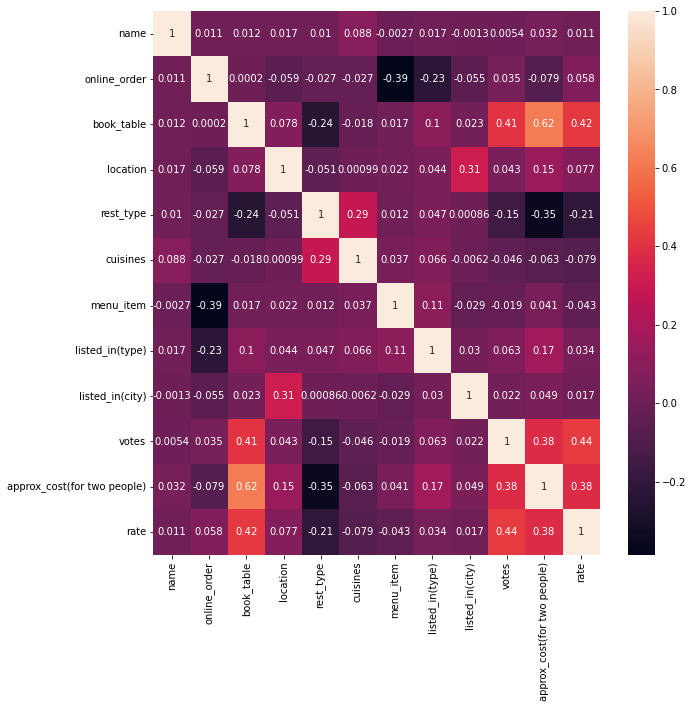

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df_preprocessed.corr(),annot=True)
plt.show()

# AFTER CLEANING

In [57]:
df_preprocessed

,name,online_order,book_table,location,rest_type,cuisines,menu_item,listed_in(type),listed_in(city),votes,approx_cost(for two people),rate
0,3685,1,1,1,27,2156,9071,0,1,0.609827,0.561804,4.1
1,7011,1,0,1,27,951,9071,0,1,0.624729,0.561804,4.1
2,6488,1,0,1,22,766,9071,0,1,0.787414,0.561804,3.8
3,199,0,0,1,78,2552,9071,0,1,-0.243334,-0.579885,3.7
4,2935,0,0,4,27,2185,9071,0,1,-0.146468,0.105128,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...
51525,899,0,0,89,8,1008,9071,6,29,-0.319087,2.160169,3.6
51526,8489,0,0,89,8,1389,9071,6,29,-0.352618,0.105128,3.7
51527,5824,0,0,89,8,1389,9071,6,29,-0.352618,3.301858,3.7
51528,1727,0,1,26,8,1389,9071,6,29,-0.059538,4.443547,4.3


# BEFORE CLEANING 

In [58]:
df1

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
